In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lls import LLS
from scipy.stats import linregress

In [49]:
np.random.seed(42)  
study_hours = np.random.uniform(0, 10, 1000)  # Between 0 and 10

raw_grades = 2 * study_hours + np.random.normal(0, 2, 1000)  # Between 0and 20
grades = np.clip(raw_grades, 0, 20) 

study_hours = study_hours.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(study_hours, grades, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 800
Testing set size: 200


In [ ]:
LLS = LLS()
w = LLS.fit(X_train, y_train)
w

array([2.00713186])

In [51]:
y_pred_test = LLS.predict(X_test)
y_pred_test= y_pred_test.flatten()
X_test = X_test.flatten()

In [52]:
slope, intercept, _, _, _ = linregress(X_train.flatten(), y_train)  
y_pred_test_scipy = slope * X_test.flatten() + intercept 
y_pred_test_scipy

array([ 7.8982071 , 16.25938604,  9.46772374,  7.42241164, 18.82051088,
       19.19295628,  9.46493987, 17.20860102,  1.84991009, 10.54448182,
       16.68729355, 15.3895279 , 10.80981295,  4.71364361,  2.84859637,
        2.22986688, 17.66803372,  2.58679893,  6.57086895,  5.39109339,
       15.40963972, 12.9697357 ,  0.93864563,  5.83561023, 11.11908649,
       14.45271374, 12.80158702, 13.79930501,  4.07068904, 17.86018736,
       12.7763186 , 19.23731647,  4.60635215, 19.51420021,  2.52288561,
       17.61202015,  5.96172629, 12.7438341 ,  1.09812048,  6.83200937,
        8.64103065, 10.62013217,  1.07544844,  1.18737111,  2.22677605,
       13.06167692,  8.74875171,  5.93507631,  2.15004193,  7.5432534 ,
       10.45234885,  4.84858243, 19.5879488 , 10.03260567,  7.61939762,
       12.24766149,  5.90221004,  0.98398487, 11.49472408, 15.99560264,
       15.36502643, 12.0625779 ,  4.97659102,  3.6748528 ,  2.903955  ,
       10.32993472, 12.21369485,  3.56800749, 15.40822691, 13.47

In [53]:
random_slope = np.random.uniform(-2, 8) 
random_intercept = np.random.uniform(-10, 10)  

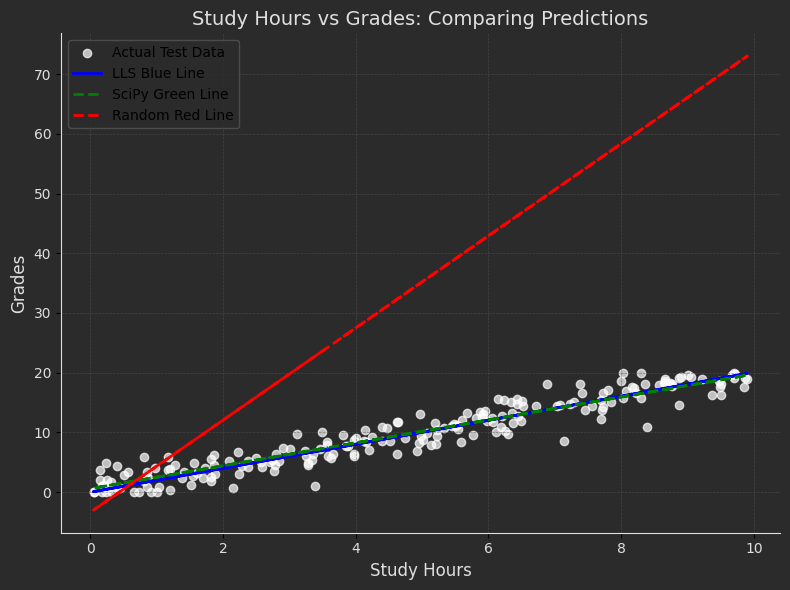

In [54]:
fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('#2b2b2b')  
ax = plt.gca()
ax.set_facecolor('#2b2b2b')  


plt.scatter(X_test, y_test, c='white', marker='o', label='Actual Test Data', alpha=0.7)

plt.plot(X_test, y_pred_test, color='blue', linewidth=2, label='LLS Blue Line')

plt.plot(X_test, y_pred_test_scipy, color='green', linewidth=2, linestyle='--', label="SciPy Green Line")

plt.plot(X_test, random_slope * X_test + random_intercept, color='red', linewidth=2, linestyle='--', label='Random Red Line')


plt.title('Study Hours vs Grades: Comparing Predictions', fontsize=14, color='#e0e0e0')
plt.xlabel('Study Hours', fontsize=12, color='#e0e0e0')
plt.ylabel('Grades', fontsize=12, color='#e0e0e0')
plt.xticks(fontsize=10, color='#e0e0e0')
plt.yticks(fontsize=10, color='#e0e0e0')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#e0e0e0')
ax.spines['bottom'].set_color('#e0e0e0')


plt.grid(color='#555555', linestyle='--', linewidth=0.5, alpha=0.6)


plt.legend(loc='upper left', fontsize=10, facecolor='#2b2b2b', edgecolor='#555555', framealpha=0.8)


plt.tight_layout()
plt.show()


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)


Mean Absolute Error (MAE): 1.3791544418285935
Mean Squared Error (MSE): 3.204628816751382
Root Mean Squared Error (RMSE): 1.7901477080820405
R-squared (R²) Score: 0.9084052070487214
